In [42]:
from gerador import gerador_instancias
import pandas as pd
import matplotlib
import time

In [43]:
# v: idx do vertice # l: limite esquerdo do intervalo do vertice # r: limite direito do intervalo do vertice 
def constroi(a: list, v: int, l: int, r: int) -> None:  
    if v == 1:     
        global st
        st = [0] * (4*len(a)) # tamanho da arvore é O(4n) -> 1 + 2 + 4 ... 2^logn <= 2^logn + 1 <= 4n
    
    if( l == r ):
        st[v] = a[l] # nós folhas (caso base)
        return None
    else:
        m = (l + r)/2

        m = int(m)

        constroi(a, v*2, l, m) # calcula o filho da esquerda recursivamente
        constroi(a, v*2+1, m + 1, r) # calcula o filho da direita recursivamente
        
        st[v] = st[v*2] + st[v*2 + 1] # a soma de um vértice interno é soma da soma dos seus filhos
        
        return None

In [44]:
a = [1, 3, -2, 8, -7]

constroi(a, 1, 0, 4)


print(st)

[0, 3, 2, 1, 4, -2, 8, -7, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [45]:
b = [0, 1, 3, 5, -2, 3]



constroi(b, 1, 0, 5)

print(st)

[0, 10, 4, 6, 1, 3, 3, 3, 0, 1, 0, 0, 5, -2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [46]:
instancias = gerador_instancias(200, 5, 10000)
tamanho_col = []
tempo_construcao_col = []  

for i in range(len(instancias)):
    
    cur_inst = instancias[i]

    start_time = time.time()

    arvore = constroi(cur_inst, 1, 0, (len(cur_inst)-1))

    tempo_construcao = time.time() - start_time

    tamanho_col.append(len(cur_inst))

    tempo_construcao_col.append(tempo_construcao)

In [47]:
df = pd.DataFrame(columns=["tamanho", "tempo_construcao"])

df["tamanho"] = tamanho_col
df["tempo_construcao"] = tempo_construcao_col 

In [48]:
df

,tamanho,tempo_construcao
0,1115,0.000610
1,5389,0.002750
2,2774,0.001462
3,1968,0.001009
4,1140,0.000573
...,...,...
195,3458,0.001594
196,2730,0.001308
197,2149,0.001035
198,573,0.000279


<Axes: xlabel='tamanho', ylabel='tempo_construcao'>

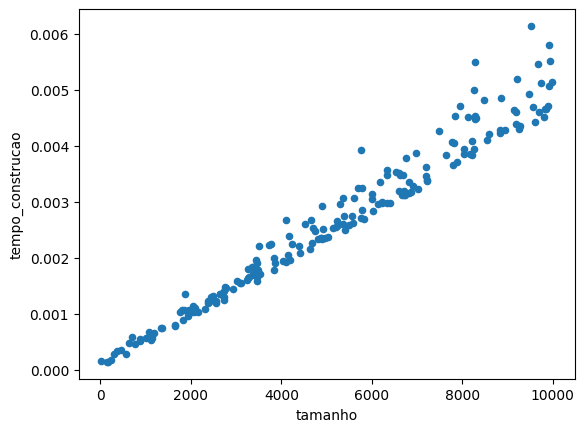

In [49]:
df.plot("tamanho", "tempo_construcao", "scatter")